# BDAT1004 Section (2)

# Professor Roshan Sahu

# Problem Set 3

# Abdul Hujjati

# Student ID: 200625568

## Question 1


Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

### Step 1: Importing libraries

import pandas as pd

### Step 2: Importing Dataset

In [626]:
datasetLink = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

### Step 3. Assign it to a variable called users

In [628]:
users = pd.read_csv(datasetLink, sep='|')
print(users)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


### Step 4. Discover what is the mean age per occupation

In [630]:
meanAgeByOccupation = users.groupby('occupation')['age'].mean()
print(meanAgeByOccupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [632]:
# creating column
users['genderCode'] = users['gender'].apply(lambda x: 0 if x == 'M' else 1)
# creating variable for ratio, taking mean and sorting
maleRatioPerOccupation = users.groupby('occupation')['genderCode'].mean().sort_values(ascending=False)
print(maleRatioPerOccupation)

occupation
homemaker        0.857143
healthcare       0.687500
librarian        0.568627
artist           0.464286
administrator    0.455696
none             0.444444
writer           0.422222
marketing        0.384615
other            0.342857
student          0.306122
educator         0.273684
salesman         0.250000
lawyer           0.166667
entertainment    0.111111
scientist        0.096774
executive        0.093750
programmer       0.090909
retired          0.071429
technician       0.037037
engineer         0.029851
doctor           0.000000
Name: genderCode, dtype: float64


### Step 6. For each occupation, calculate the minimum and maximum ages

In [634]:
minAndMaxAgesByOccupation = users.groupby('occupation')['age'].agg(['min','max'])
print(minAndMaxAgesByOccupation)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


### Step 7. For each combination of occupation and sex, calculate the mean age

In [636]:
OccupationAndSexMeanAge = users.groupby(['occupation', 'gender'])['age'].mean()
print(OccupationAndSexMeanAge)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### Step 8. For each occupation present the percentage of women and men

In [638]:
genderCount = users.groupby(['occupation','gender']).size().unstack()
genderPercent = genderCount.div(genderCount.sum(axis=1),axis=0) * 100
print(genderPercent)

gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


## Question 2

Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

### Step 1. Import the necessary libraries

import pandas as pd

### Step 2. Import the dataset

In [644]:
euroTeamsLink = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

### Step 3. Assign it to Variable euro12

In [646]:
euro12 = pd.read_csv(euroTeamsLink)
print(euro12)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

### Step 4. Select only the Goal column


In [648]:
goals = euro12['Goals']
print(goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


### Step 5. How many teams participated in the Euro2012?

In [650]:
teamsParticipatedCount = euro12['Team'].nunique()
print(teamsParticipatedCount)

16


### Step 7. View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline

In [652]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


### Step 8: Sort the teams by Red Cards, then by Yellow Cards

In [654]:
teamsSorted = euro12[['Team', 'Red Cards', 'Yellow Cards']].sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
print(teamsSorted)

                   Team  Red Cards  Yellow Cards
6                Greece          1             9
9                Poland          1             7
11  Republic of Ireland          1             6
7                 Italy          0            16
10             Portugal          0            12
13                Spain          0            11
0               Croatia          0             9
1        Czech Republic          0             7
14               Sweden          0             7
4                France          0             6
12               Russia          0             6
3               England          0             5
8           Netherlands          0             5
15              Ukraine          0             5
2               Denmark          0             4
5               Germany          0             4


### Step 9. Calculate the mean Yellow Cards given per Team

In [656]:
meanYellowCardsByTeam = euro12.groupby('Team')['Yellow Cards'].mean()
print(meanYellowCardsByTeam)

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


### Step 10. Filter teams that scored more than 6 goals

In [658]:
TeamsWithMoreThanSixGoals = euro12[euro12['Goals']>6]
print(TeamsWithMoreThanSixGoals)

       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

### Step 11. Select the teams that start with G

In [660]:
namesStartWithG = euro12[euro12['Team'].str.startswith('G')]
print(namesStartWithG)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


### Step 12. Select the first 7 columns

In [662]:
firstSevenColumns = euro12.iloc[:, :7]
print(firstSevenColumns)


                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

### Step 13. Select all columns except the last 3

In [664]:
notLastThreeColumns = euro12.iloc[:, :-3]
print(notLastThreeColumns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

### Step 14: Present only the Shooting Accuracy from England, Italy, and Russia

In [666]:
shootingAccuracyEngItlRus = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print(shootingAccuracyEngItlRus)


       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


## Question 3

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299


### Step 1. Import the necessary libraries

In [670]:
import pandas as pd
import numpy as np

### Step 2. Create 3 different Series, each of length 100


In [672]:
np.random.seed(0)

series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30000, size=100))



### Step 3. Create a DataFrame by joining the Series by column

In [674]:
dataFrame = pd.concat([series1, series2, series3], axis=1)
print(dataFrame)

    0  1      2
0   1  2  15021
1   4  3  11134
2   2  1  26409
3   1  1  19680
4   4  3  27340
.. .. ..    ...
95  1  2  28161
96  3  2  29745
97  4  1  18338
98  2  1  24676
99  1  1  12562

[100 rows x 3 columns]


### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter


In [676]:
dataFrame.columns =['bedrs', 'bathrs', 'price_sqr_meter']
print(dataFrame)

    bedrs  bathrs  price_sqr_meter
0       1       2            15021
1       4       3            11134
2       2       1            26409
3       1       1            19680
4       4       3            27340
..    ...     ...              ...
95      1       2            28161
96      3       2            29745
97      4       1            18338
98      2       1            24676
99      1       1            12562

[100 rows x 3 columns]


### Step 5. Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [678]:
bigColumn = pd.DataFrame(pd.concat([series1, series2, series3], ignore_index=True), columns=['bigcolumn'])
print(bigColumn)

     bigcolumn
0            1
1            4
2            2
3            1
4            4
..         ...
295      28161
296      29745
297      18338
298      24676
299      12562

[300 rows x 1 columns]


### Step 6. Check if the DataFrame only goes until index 99

In [680]:
print(bigColumn.index[-1]==99)

False


### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [682]:
bigColumn = bigColumn.reindex(range(300))
print(bigColumn)

     bigcolumn
0            1
1            4
2            2
3            1
4            4
..         ...
295      28161
296      29745
297      18338
298      24676
299      12562

[300 rows x 1 columns]


## Question 4

Wind Statistics
The data have been modified to contain some missing values, identified by NaN. 
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or 
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL 
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day.

### Step 1. Import the necessary libraries

In [686]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from the attached file wind.txt

In [101]:
data = pd.read_csv('wind.txt', delim_whitespace=True)
print(data.head())

   Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  


C:\Users\abdul\AppData\Local\Temp\ipykernel_22568\2403365621.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('wind.txt', delim_whitespace=True)


### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [103]:
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
data.set_index('Date', inplace=True)
data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)

### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [105]:
def fix_year(df):
    df.index = df.index.where(df.index.year <= 2023, df.index - pd.DateOffset(years=100))
    return df

data = fix_year(data)
print(data)

              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
Date                                                                        
1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04   
1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25   
1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50   
1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46   
1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58   

### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [29]:
#performed in step 4

### Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.

In [107]:
missing_values = data.isna().sum()
print(missing_values)

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


### Step 7. Compute how many non-missing values there are in total.

In [52]:
non_missing_values = data.notna().sum().sum()
print(non_missing_values)

78857


### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. 


In [54]:
mean_windspeed = data.mean().mean()
print(mean_windspeed)

10.227982360836938


### Step 9. A single number for the entire dataset.
Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days

In [58]:
loc_stats = data.describe().transpose()
loc_stats['std'] = data.std()
print(loc_stats)

      count       mean       std   min    25%    50%    75%    max
RPT  6568.0  12.362987  5.618413  0.67   8.12  11.71  15.92  35.80
VAL  6571.0  10.644314  5.267356  0.21   6.67  10.17  14.04  33.37
ROS  6572.0  11.660526  5.008450  1.50   8.00  10.92  14.67  33.84
KIL  6569.0   6.306468  3.605811  0.00   3.58   5.75   8.42  28.46
SHA  6572.0  10.455834  4.936125  0.13   6.75   9.96  13.54  37.54
BIR  6574.0   7.092254  3.968683  0.00   4.00   6.83   9.67  26.16
DUB  6571.0   9.797343  4.977555  0.00   6.00   9.21  12.96  30.37
CLA  6572.0   8.495053  4.499449  0.00   5.09   8.08  11.42  31.08
MUL  6571.0   8.493590  4.166872  0.00   5.37   8.17  11.19  25.88
CLO  6573.0   8.707332  4.503954  0.04   5.33   8.29  11.63  28.21
BEL  6574.0  13.121007  5.835037  0.13   8.71  12.50  16.88  42.38
MAL  6570.0  15.599079  6.699794  0.67  10.71  15.00  19.83  42.54


### Step 10. A different set of numbers for each location.
Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each 
day.

In [61]:
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
print(day_stats)

             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


### Step 11. A different set of numbers for each day.
 Find the average windspeed in January for each location. 
Treat January 1961 and January 1962 both as January

In [109]:
january_data = data[data.index.month == 1]
print(january_data)

              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
Date                                                                        
1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1978-01-27  18.54   9.59  15.67   6.42  10.34   7.04  11.63   9.38   9.46   
1978-01-28  35.38  29.88  18.00  15.96  26.92  15.67  15.87  26.34  15.04   
1978-01-29  29.38  18.54  28.08  17.12  17.50  13.75  25.54  15.67  18.08   
1978-01-30   9.62   8.71   9.59   2.71   7.58   3.54   6.08   6.08   5.33   
1978-01-31  10.50   8.79   9.54   4.42  10.58   5.46   8.00   5.71   6.50   

### Step 12. Downsample the record to a yearly frequency for each location. 

In [113]:
yearly_data = data.resample('YE').mean()
print(yearly_data)

                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

### Step 13. Downsample the record to a monthly frequency for each location. 

In [117]:
monthly_data = data.resample('ME').mean()
print(monthly_data)

                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

### Step 14. Downsample the record to a weekly frequency for each location.

In [121]:
weekly_data = data.resample('W').mean()
print(weekly_data)

                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on B
January 2 1961) for the first 52 weeks.

In [125]:
weekly_detailed_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).head(52)
print(weekly_detailed_stats)

              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3

## Question 5

### Step 1. Import the necessary libraries

import pandas as pd

### Step 2 and 3. Import the dataset from this address. 

In [708]:
link = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(link, sep='\t')

### Step 4. See the first 10 entries

In [710]:
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### Step 5. What is the number of observations in the dataset? 

In [712]:
numObservations = chipo.shape[0]
print(numObservations)

4622


### Step 6. What is the number of columns in the dataset?

In [714]:
column_nums = (chipo.shape[1])
print(column_nums)

5


### Step 7. Print the name of all the columns.

In [716]:
 print(chipo.columns.tolist())

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


### Step 8. How is the dataset indexed?

In [718]:
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


### Step 9. Which was the most-ordered item?

In [720]:
mostOrderedItem = chipo.groupby('item_name')['quantity'].sum().idxmax()
print(mostOrderedItem)

Chicken Bowl


### Step 10. For the most-ordered item, how many items were ordered?

In [722]:
mostOrderedItemNum = chipo.groupby('item_name')['quantity'].sum().max()
print(mostOrderedItemNum)

761


### Step 11. What was the most ordered item in the choice_description column? 

In [724]:
most_ord_choice_descr = chipo['choice_description'].value_counts().idxmax()
print(most_ord_choice_descr)

[Diet Coke]


### Step 12. How many items were orderd in total?

In [726]:
total_ordered = chipo['quantity'].sum()
print(total_ordered)

4972


### Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [728]:
### Turn the item price into a float 
chipo['item_price'] = chipo['item_price'].str.replace('$','').astype(float)

### Step 14. How much was the revenue for the period in the dataset? 

In [730]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()
print(total_revenue)

39237.02


### Step 15. How many orders were made in the period?

In [732]:
total_order = chipo['order_id'].nunique()
print(total_order)

1834


### Step 16. What is the average revenue amount per order? 

In [734]:
avg_rev_per_ord = total_revenue / total_order
print(avg_rev_per_ord)

21.39423118865867


### Step 17. How many different items are sold?

In [736]:
diff_items_num = chipo['item_name'].nunique()
print(diff_items_num)

50


## Question 6 Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

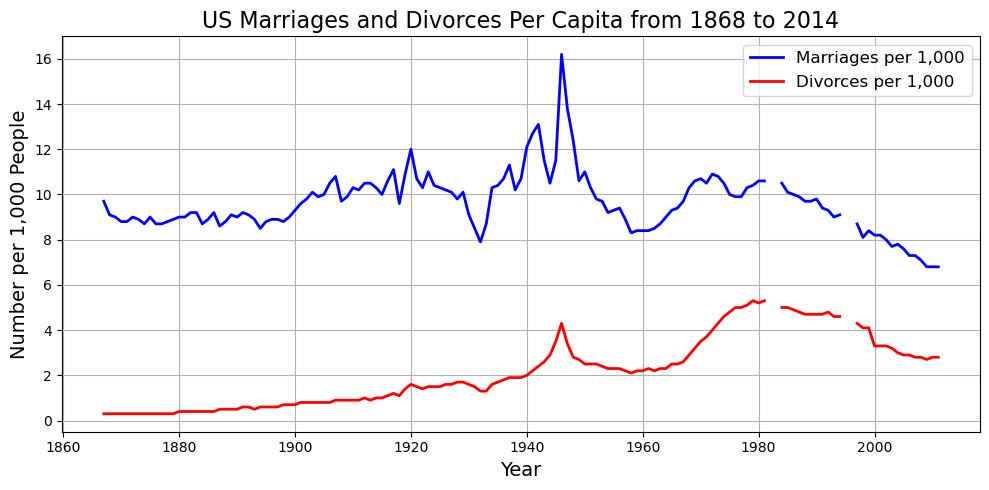

In [738]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

plt.figure(figsize=(10,5))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1,000', color='blue', linewidth=2)
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1,000', color='red', linewidth=2)

plt.xlabel('Year', fontsize='14')
plt.ylabel('Number per 1,000 People', fontsize=14)

plt.title('US Marriages and Divorces Per Capita from 1868 to 2014', fontsize=16)
plt.legend(fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

## Question 7 Create a vertical bar chart comparing the number of marriages and divorces per  capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

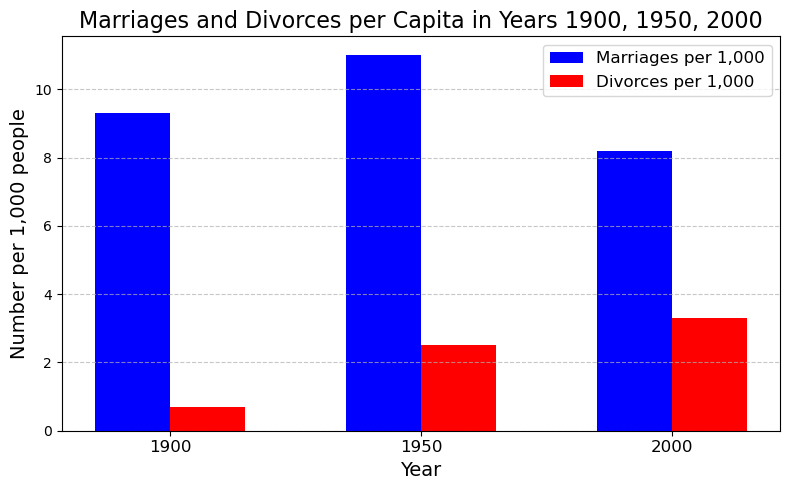

In [740]:
import pandas as pd
import matplotlib.pyplot as plt

years_selected = data[data['Year'].isin([1900, 1950, 2000])]

plt.figure(figsize=(8,5))
bar_width = 0.3
index = range(len(years_selected))

plt.bar(index, years_selected['Marriages_per_1000'], bar_width, label='Marriages per 1,000', color='blue')
plt.bar([i + bar_width for i in index], years_selected['Divorces_per_1000'], bar_width, label='Divorces per 1,000', color='red')

plt.xlabel('Year',fontsize=14)
plt.ylabel('Number per 1,000 people', fontsize=14)
plt.title('Marriages and Divorces per Capita in Years 1900, 1950, 2000', fontsize=16)
plt.xticks([i + bar_width /2 for i in index], years_selected['Year'], fontsize=12)

plt.legend(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Question 8. Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. 
Don't forget to label your axes!


In [742]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("actor_kill_counts.csv")

print(data)

                   Actor  Count
0  Arnold Schwarzenegger    369
1           Chow Yun-Fat    295
2         Clint Eastwood    207
3             Clive Owen    194
4         Dolph Lundgren    239
5                 Jet Li    201
6           Nicolas Cage    204
7     Sylvester Stallone    267
8    Tomisaburo Wakayama    226
9          Wesley Snipes    193


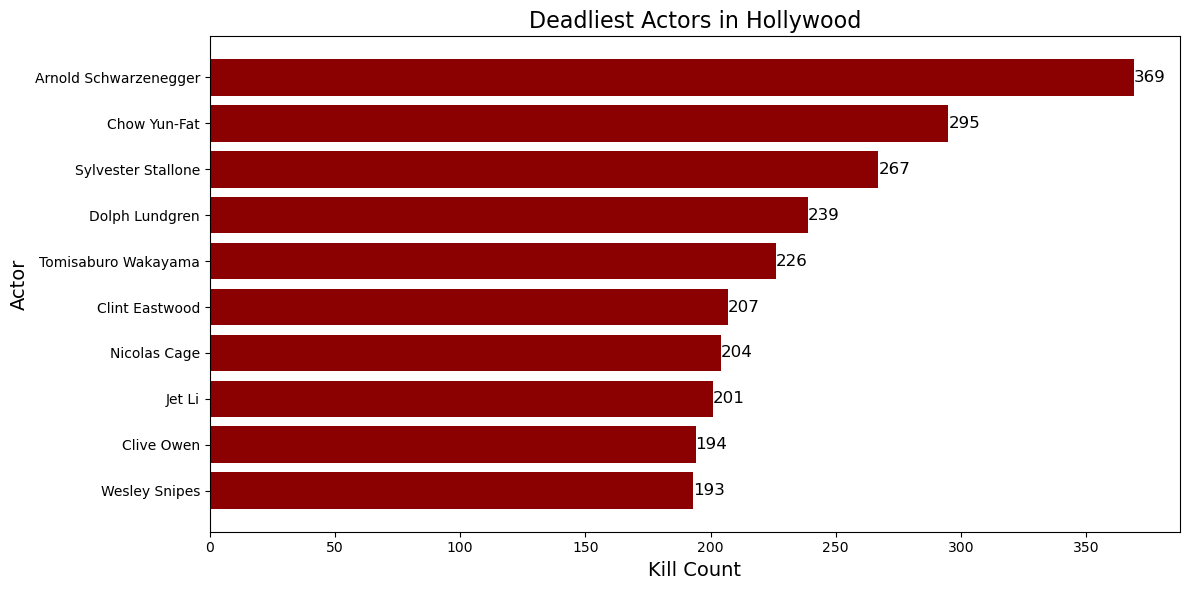

In [743]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("actor_kill_counts.csv")

data = data.sort_values(by='Count', ascending=True)

plt.figure(figsize=(12,6))
plt.barh(data['Actor'], data['Count'], color='darkred')

plt.xlabel('Kill Count', fontsize=14)
plt.ylabel('Actor', fontsize=14)
plt.title('Deadliest Actors in Hollywood', fontsize=16)

for index, value in enumerate(data['Count']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=12)

plt.tight_layout()
plt.show()


## Question 9 Create a pie chart showing the fraction of all Roman Emperors that were assassinated. 
Make sure that the pie chart is an even circle, labels the categories, and shows the  percentage breakdown of the categories.

           Emperor  Length_of_Reign         Cause_of_Death
0         Augustus            40.58  Possibly assassinated
1         Tiberius            22.50  Possibly assassinated
2         Caligula             4.83           Assassinated
3         Claudius            13.75  Possibly assassinated
4             Nero            13.67                Suicide
..             ...              ...                    ...
63   Valentinian I            11.00         Natural causes
64          Valens            14.00       Killed in battle
65         Gratian            16.00           Assassinated
66  Valentinian II            17.00  Possibly assassinated
67    Theodosius I            16.00         Natural causes

[68 rows x 3 columns]


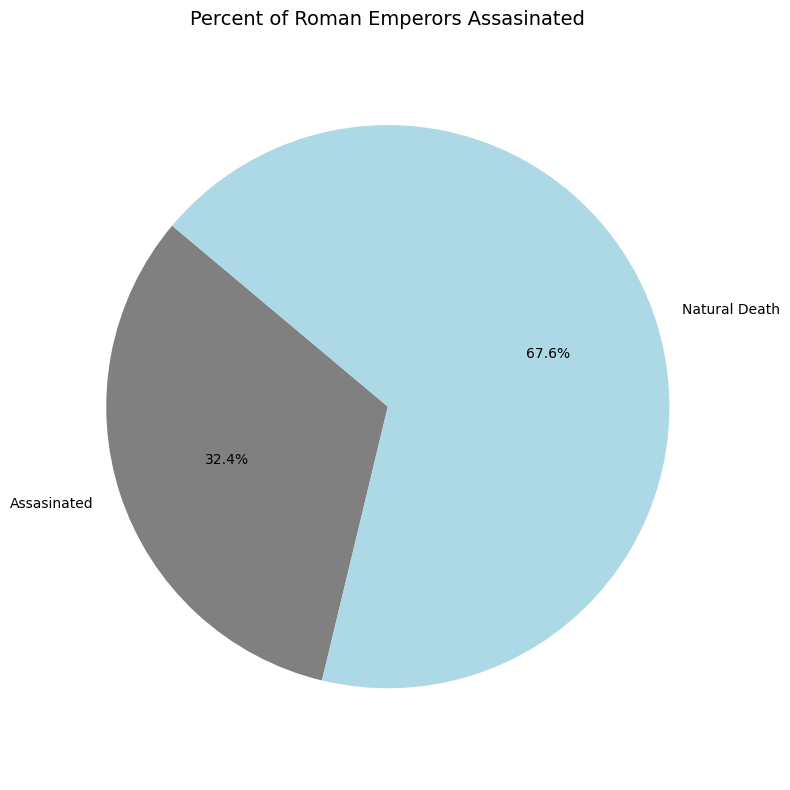

In [745]:
import pandas as pd
import matplotlib.pyplot as plt

emperors = pd.read_csv('roman-emperor-reigns.csv')

print(emperors)

assasinated_count = emperors['Cause_of_Death'].value_counts()

assasinated = assasinated_count.get('Assassinated',0)
natural_death = assasinated_count.sum() - assasinated

categories = ['Assasinated', 'Natural Death']
values = [assasinated, natural_death]

plt.figure(figsize=(8,8))
plt.pie(
    values,
    labels=categories,
    autopct='%1.1f%%',
    startangle=140,
    colors=['grey', 'lightblue']
)
plt.title('Percent of Roman Emperors Assasinated',fontsize=14)
plt.axis('equal')
plt.tight_layout()

plt.show()

## Question 10. Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes! 
Color each dot according to its year.

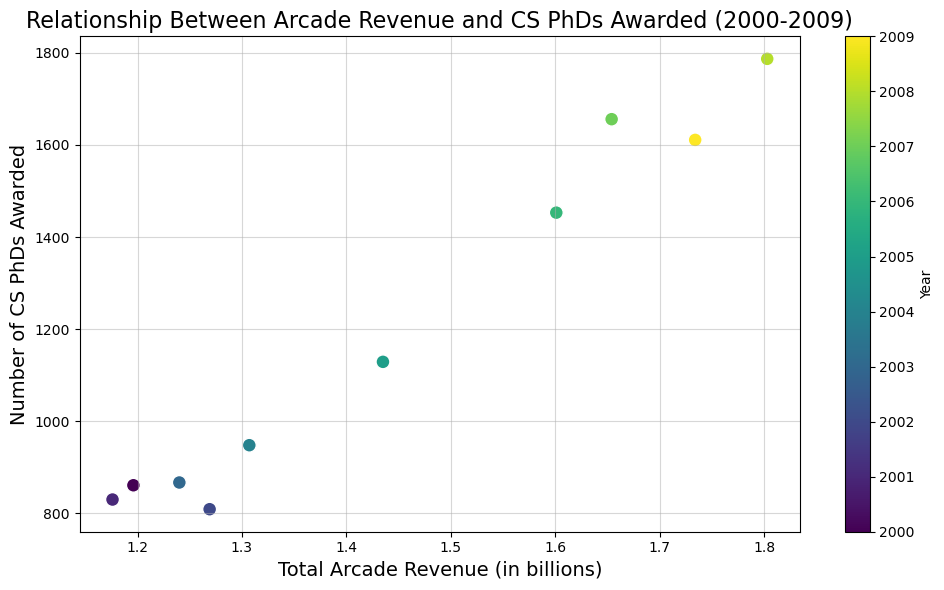

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    dataset['Total Arcade Revenue (billions)'], 
    dataset['Computer Science Doctorates Awarded (US)'], 
    c=dataset['Year'], 
    cmap='viridis', 
    s=100, 
    edgecolor='w'
)

plt.colorbar(scatter, label='Year')

plt.xlabel('Total Arcade Revenue (in billions)', fontsize=14)
plt.ylabel('Number of CS PhDs Awarded', fontsize=14)
plt.title('Relationship Between Arcade Revenue and CS PhDs Awarded (2000-2009)', fontsize=16)

plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()